In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.3 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=ee17c60e492cc4c874bf8b16773362ce979d593df2d95f5c4c6f4d59e7577f23
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [3]:
import numpy as np
import pandas as pd
import chardet
from sentence_transformers import SentenceTransformer, util
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model

In [4]:
f = '/content/drive/MyDrive/Spring 2024/AI_EarthHack_Dataset.csv'
data = pd.read_csv(f, encoding = 'latin-1')
data

,id,problem,solution
0,1,The construction industry is indubitably one o...,"Herein, we propose an innovative approach to m..."
1,2,"I'm sure you, like me, are feeling the heat - ...","Imagine standing on a green hill, not a single..."
2,3,The massive shift in student learning towards ...,"Implement a """"Book Swap"""" program within educa..."
3,4,The fashion industry is one of the top contrib...,The proposed solution is a garment rental serv...
4,5,The majority of the materials used in producin...,An innovative concept would be a modular elect...
...,...,...,...
1295,1296,"The linear 'take, make, dispose' model of prod...","Addressing this problem, a two-pronged circula..."
1296,1297,The conundrum we face is the improper disposal...,The proposed solution is a cutting-edge recycl...
1297,1298,This solution will help the vegetation,Use old tea bags as compost for soil
1298,1299,Accumulation and improper disposal of single-u...,My proposed solution is to implement an innova...


In [5]:
data['problem'][0]

'The construction industry is indubitably one of the significant contributors to global waste, contributing approximately 1.3 billion tons of waste annually, exerting significant pressure on our landfills and natural resources. Traditional construction methods entail single-use designs that require frequent demolitions, leading to resource depletion and wastage.   '

In [6]:
problems, solutions = list(data['problem']), list(data['solution'])

In [7]:
embedder = SentenceTransformer('paraphrase-MiniLM-L6-v2')
corpus_embeddings = embedder.encode(problems, batch_size=64, show_progress_bar=True, convert_to_tensor=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/21 [00:00<?, ?it/s]

In [ ]:
clusters = util.community_detection(corpus_embeddings, min_community_size=25, threshold=0.75)

# print("Clustering done after {:.2f} sec".format(time.time() - start_time))

#Print for all clusters the top 3 and bottom 3 elements
for i, cluster in enumerate(clusters):
    print("\nCluster {}, #{} Elements ".format(i+1, len(cluster)))
    for sentence_id in cluster[0:3]:
        print("\t", problems[sentence_id])
    print("\t", "...")
    for sentence_id in cluster[-3:]:
        print("\t", problems[sentence_id])


Cluster 1, #171 Elements 
	 The fashion industry is one of the top contributors to global pollution. The mass production, distribution and disposal of clothing is not sustainable long-term, leading to the release of greenhouse gases from manufacturing, shipping and wasted clothing in landfills.   
	 The fashion industry is the second-largest polluter in the world, right after the oil industry. Every year, the world consumes about 80 billion new pieces of clothing, and this production consumes resources, raises the carbon footprint, and produces waste. The fast fashion cycle encourages this overconsumption model, causing tremendous stress on our planet's resources.   
	 The fashion industry contributes about 10% of global CO2 emissions, with fast fashion being the major contributor. Fast fashion leads to the creation of end-of-life waste, where 85% of textile waste ends up in landfills or is incinerated. Furthermore, the industries involved in the production of fast-fashion are found i

In [ ]:
X_train = np.array(corpus_embeddings[:10])
y1_train = np.random.rand(10)
y2_train = np.random.rand(10)
X_train.shape, y1_train.shape, y2_train.shape

((10, 384), (10,), (10,))

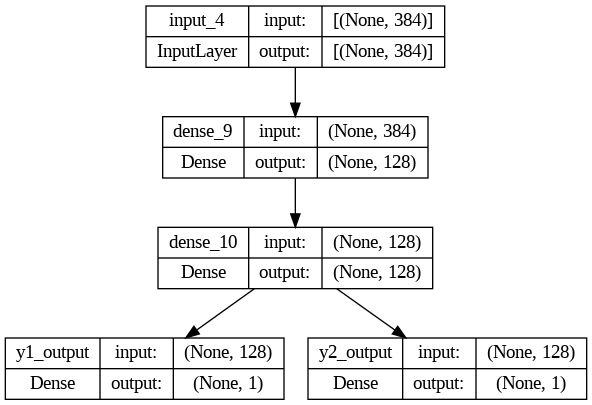

In [ ]:
input_layer = Input(shape=(384))
dense_layer_1 = Dense(units = 128, activation = "relu")(input_layer)
dense_layer_2 = Dense(units = 128, activation = "relu")(dense_layer_1)
dense_layer_3 = Dense(units = 64, activation = "relu")(dense_layer_2)

#Y1 output
y1_output = Dense(units = 1, activation = "linear", name = "y1_output")(dense_layer_2)

#Y2 output
y2_output = Dense(units = 1, activation = "linear", name = "y2_output")(dense_layer_2)

#Define the model with the input layer and a list of outputs
model = Model(inputs = input_layer, outputs = [y1_output, y2_output])

#specify the optimizer and compile with the loss function for both outputs
optimizer = tf.keras.optimizers.SGD(lr=0.001)

model.compile(optimizer = optimizer,
              loss = {'y1_output':'mse', 'y2_output':'mse'},
              metrics = {
                  'y1_output':tf.keras.metrics.RootMeanSquaredError(),
                  'y2_output':tf.keras.metrics.RootMeanSquaredError(),
              }
             )
plot_model(model, show_shapes = True)

In [ ]:
history = model.fit(X_train, (y1_train, y2_train), epochs = 19, batch_size = 10)

Epoch 1/19
1/1 [==============================] - 0s 15ms/step - loss: 8.8733e-06 - y1_output_loss: 7.2689e-06 - y2_output_loss: 1.6045e-06 - y1_output_root_mean_squared_error: 0.0027 - y2_output_root_mean_squared_error: 0.0013
Epoch 2/19
1/1 [==============================] - 0s 13ms/step - loss: 8.5155e-06 - y1_output_loss: 6.9776e-06 - y2_output_loss: 1.5378e-06 - y1_output_root_mean_squared_error: 0.0026 - y2_output_root_mean_squared_error: 0.0012
Epoch 3/19
1/1 [==============================] - 0s 12ms/step - loss: 8.1564e-06 - y1_output_loss: 6.6860e-06 - y2_output_loss: 1.4705e-06 - y1_output_root_mean_squared_error: 0.0026 - y2_output_root_mean_squared_error: 0.0012
Epoch 4/19
1/1 [==============================] - 0s 13ms/step - loss: 7.8247e-06 - y1_output_loss: 6.4180e-06 - y2_output_loss: 1.4067e-06 - y1_output_root_mean_squared_error: 0.0025 - y2_output_root_mean_squared_error: 0.0012
Epoch 5/19
1/1 [==============================] - 0s 11ms/step - loss: 7.4952e-06 - y1_o

# GenAI intergration

In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.


In [ ]:
from openai import OpenAI
client = OpenAI()

response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "user", "content": "Who won the world series in 2020?"},
  ]
)

ImportError: cannot import name 'Iterator' from 'typing_extensions' (/usr/local/lib/python3.10/dist-packages/typing_extensions.py)

In [12]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 1.7 MB/s eta 0:00:00


In [8]:
import torch
from transformers import pipeline

pipe = pipeline("text-generation", model="TinyLlama/TinyLlama-1.1B-Chat-v1.0", torch_dtype=torch.bfloat16)

# We use the tokenizer's chat template to format each message - see https://huggingface.co/docs/transformers/main/en/chat_templating
messages = [
    {
        "role": "system",
        "content": "You are a friendly chatbot who always responds in the style of a pirate",
    },
    {"role": "user", "content": "How many helicopters can a human eat in one sitting?"},
]
prompt = pipe.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
outputs = pipe(prompt, max_new_tokens=256, do_sample=True, temperature=0.7, top_k=50, top_p=0.95)
print(outputs[0]["generated_text"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

<|system|>
You are a friendly chatbot who always responds in the style of a pirate</s>
<|user|>
How many helicopters can a human eat in one sitting?</s>
<|assistant|>
As per the given material, it is not specified how many helicopters a human can eat in one sitting. The passage only mentions that it takes hours to finish an entire meal, and it does not specify the exact number of helicopters needed to finish a full meal.
